Aquesta base de dades recull les dades relacionades amb la discapacitat de la persona

En aquesta base de dades ens hem trobat en què hi ha vàries entrades duplicades per ID però en les que hi ha diferents camps no omplerts en una i si en una altra, per la qual cosa hem deduït que el programa ha introduït una nova entrada quan s’han introduït nous camps i per tant hem unit les entrades per ID unint els valors faltants per als introduïts.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Dades Discapacitat.csv',encoding='utf-8',sep=';')
df_dic=pd.read_csv('Dict.csv',encoding='utf-8',sep=',')

df_i=df
#seleccionem columnes
df=df[['acapp_dades_discapacitat_contactscontacts_ida','Té certificat CAD','% Grau Discapacitat','Temps CAD','On sordesa','Rep ajut econòmic?','Presenta pluridiscapacitat?','Tipus pluridiscapacitat','Pren medicació','Tipus de sordesa','Moment apareix sordesa','Quan inici pèrdua','Causa pèrdua auditiva','Porta audiòfon?','Porta implant coclear?','On implant coclear','Sistema de comunicació','Hospital o consulta que fa seguiment']]
#cambiar nombre acapp_dades_discapacitat_contactscontacts_ida por ID
df.rename(columns={'acapp_dades_discapacitat_contactscontacts_ida':'ID'},inplace=True)



/tmp/ipykernel_13096/46014038.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'acapp_dades_discapacitat_contactscontacts_ida':'ID'},inplace=True)


In [3]:
df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])
df.head()

/tmp/ipykernel_13096/1252908069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])


,ID,Té certificat CAD,% Grau Discapacitat,Temps CAD,On sordesa,Rep ajut econòmic?,Presenta pluridiscapacitat?,Tipus pluridiscapacitat,Pren medicació,Tipus de sordesa,Moment apareix sordesa,Quan inici pèrdua,Causa pèrdua auditiva,Porta audiòfon?,Porta implant coclear?,On implant coclear,Sistema de comunicació,Hospital o consulta que fa seguiment
0,NaN,NaN,45.0,NaN,Unilateral OD,NaN,Sí,NaN,NaN,NaN,Prelocutiva,NaN,Genètica,Sí,No,NaN,Oral,NaN
1,19c7d363-71c1-f441-5e47-5e0dc5e4a1fd,Sí,34.0,Permanent,NaN,Sí,Sí,NaN,Sí,Neurosensorial,Prelocutiva,NaN,NaN,No,Sí,NaN,NaN,Hospital Sant Joan de Déu
2,73e5a12f-3169-8bb5-8181-60b8a4df5100,Sí,34.0,NaN,Biilateral,NaN,NaN,NaN,NaN,Neurosensorial,Prelocutiva,neixement,Desconeguda,No,Sí,Ambdues oïdes,Oral,NaN
3,c8a7044c-a15e-6426-be3a-5bf7c9e43700,NaN,74.0,NaN,NaN,NaN,Sí,NaN,NaN,NaN,Prelocutiva,Naixement,Adquirida,No,No,NaN,NaN,NaN
4,9b49d2b7-97eb-a44a-fe3a-5f7b14f2400d,Sí,78.0,NaN,Biilateral,NaN,NaN,NaN,NaN,Neurosensorial,Prelocutiva,NaN,Desconeguda,No,NaN,NaN,Signes,NaN


In [4]:
#nulls ID
df['ID'].isnull().sum()

205

In [5]:
#Eliminamos entrades sin id
df = df.dropna(subset=["ID"])

In [7]:
#cantidad de duplicados por la columna ID
df['ID'].duplicated().sum()

194

In [8]:
# Unir filas con mismo ID y rellenar valores faltantes
df = df.groupby('ID').apply(lambda x: x.fillna(method='ffill')).reset_index(drop=True)
#eliminar duplicados


/tmp/ipykernel_13096/2480752121.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('ID').apply(lambda x: x.fillna(method='ffill')).reset_index(drop=True)


In [10]:
#cantidad de duplicados por la columna ID
df['ID'].duplicated().sum()

194

In [11]:
df = df.drop_duplicates()
df.head()

,ID,Té certificat CAD,% Grau Discapacitat,Temps CAD,On sordesa,Rep ajut econòmic?,Presenta pluridiscapacitat?,Tipus pluridiscapacitat,Pren medicació,Tipus de sordesa,Moment apareix sordesa,Quan inici pèrdua,Causa pèrdua auditiva,Porta audiòfon?,Porta implant coclear?,On implant coclear,Sistema de comunicació,Hospital o consulta que fa seguiment
0,19c7d363-71c1-f441-5e47-5e0dc5e4a1fd,Sí,34.0,Permanent,NaN,Sí,Sí,NaN,Sí,Neurosensorial,Prelocutiva,NaN,NaN,No,Sí,NaN,NaN,Hospital Sant Joan de Déu
1,73e5a12f-3169-8bb5-8181-60b8a4df5100,Sí,34.0,NaN,Biilateral,NaN,NaN,NaN,NaN,Neurosensorial,Prelocutiva,neixement,Desconeguda,No,Sí,Ambdues oïdes,Oral,NaN
2,c8a7044c-a15e-6426-be3a-5bf7c9e43700,NaN,74.0,NaN,NaN,NaN,Sí,NaN,NaN,NaN,Prelocutiva,Naixement,Adquirida,No,No,NaN,NaN,NaN
3,9b49d2b7-97eb-a44a-fe3a-5f7b14f2400d,Sí,78.0,NaN,Biilateral,NaN,NaN,NaN,NaN,Neurosensorial,Prelocutiva,NaN,Desconeguda,No,NaN,NaN,Signes,NaN
4,a740b955-6c2f-5dff-4aa5-5e0dc5afbb5a,No,0.0,Permanent,NaN,Sí,Sí,NaN,Sí,Neurosensorial,Perilocutiva,NaN,NaN,No,No,NaN,NaN,HSJD Dra Claveria


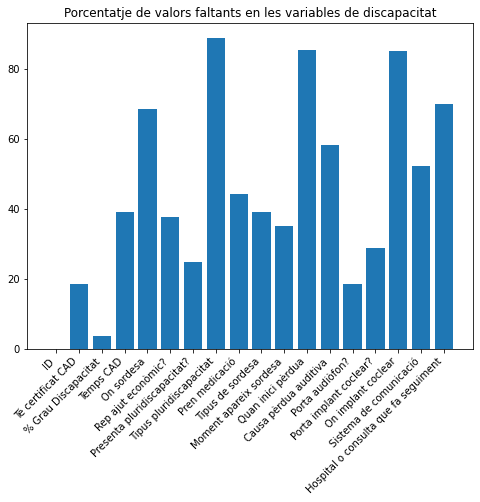

In [12]:
#ver porcentaje de nans por columna
df.isnull().sum()/df.shape[0]*100
#graficar porcentaje de nans
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
df.isnull().sum()/df.shape[0]*100
plt.bar(df.columns,df.isnull().sum()/df.shape[0]*100)
plt.xticks(rotation=45, ha='right')
plt.title('Porcentatje de valors faltants en les variables de discapacitat')
plt.show()

In [13]:
df.isnull().sum()/df.shape[0]*100

ID                                       0.000000
Té certificat CAD                       18.487395
% Grau Discapacitat                      3.819710
Temps CAD                               39.190222
On sordesa                              68.601986
Rep ajut econòmic?                      37.815126
Presenta pluridiscapacitat?             24.828113
Tipus pluridiscapacitat                 88.693659
Pren medicació                          44.155844
Tipus de sordesa                        39.190222
Moment apareix sordesa                  35.141329
Quan inici pèrdua                       85.485103
Causa pèrdua auditiva                   58.135982
Porta audiòfon?                         18.487395
Porta implant coclear?                  28.724217
On implant coclear                      84.950344
Sistema de comunicació                  52.330023
Hospital o consulta que fa seguiment    69.824293
dtype: float64

In [14]:
#pasar df_dades_discapacitat a csv
df.to_csv('dades_discapacitat_final.csv', index=False, encoding='utf-8')